In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers=pd.read_csv("D:\School\Minor Project\Codes\customers.csv")

In [3]:
customers.head()

,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category
0,45,M,3,High School,Married,$60K - $80K
1,49,F,5,Graduate,Single,Less than $40K
2,51,M,3,Graduate,Married,$80K - $120K
3,40,M,3,Uneducated,Married,$60K - $80K
4,44,M,2,Graduate,Married,$40K - $60K


In [4]:
# using elbow mehod, determining the optimal number of clusters(k)
cost = []
for k in range(1,8):
    try:
        kproto=KPrototypes(n_jobs=-1,n_clusters=k,init='Cao',random_state=0)
        kproto.fit_predict(customers,categorical=[1,3,4,5])
        cost.append(kproto.cost_)
    except:
        print('Cant cluster with {} clusters'.format(k))
        break

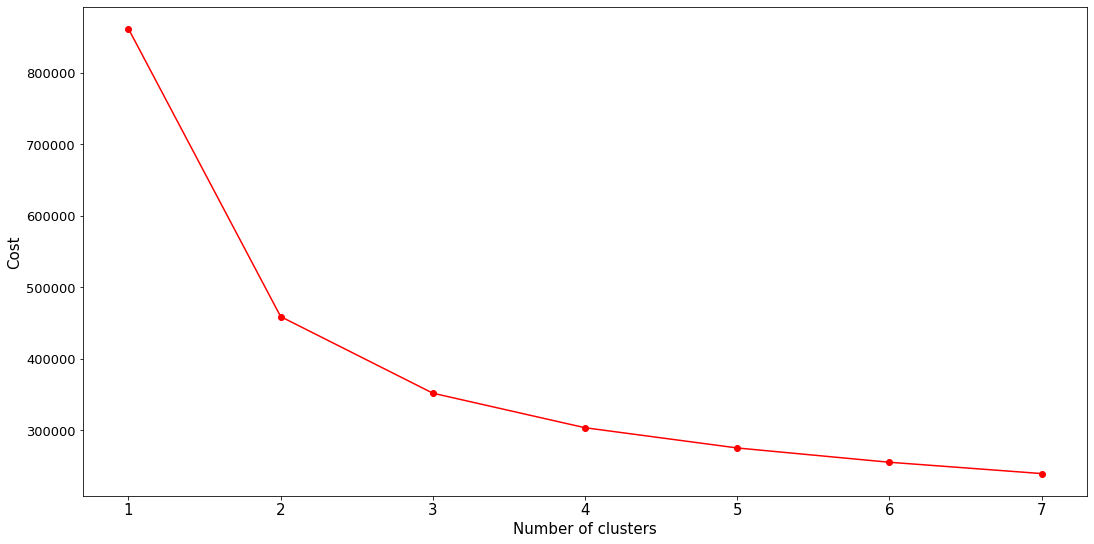

In [7]:
plt.figure(figsize=(18,9))
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.xlabel("Number of clusters",fontsize=15)
plt.ylabel("Cost",fontsize=15)
lineDiag,=plt.plot([1,2,3,4,5,6,7],cost,marker="o")
lineDiag.set_color("r")

In [8]:
#from this we can see that the 'elbow' lies at 3. Therefore we can conclude that number of optimal clusters for the data is 3(k)

In [10]:
pickle_out=open("elbowCost.pickle","wb")
pickle.dump(cost,pickle_out)